# EDA0930
- json파일을 Dataframe으로 변경
- train-split 나누는 기준 고민

In [1]:
import pandas as pd
import json
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_json_path = '/opt/ml/detection/dataset/train.json'
with open(train_json_path,'r') as j:
    train=json.loads(j.read())

In [3]:
annotations = train['annotations']
images_info = train['images']

In [4]:
annotation_df = pd.DataFrame(annotations) #annotation데이터
images_info_df = pd.DataFrame(images_info) #image파일명 데이터

In [6]:
annotation_df.head(10)

,image_id,category_id,area,bbox,iscrowd,id
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4
5,1,5,188324.40,"[3.7, 448.5, 778.2, 242.0]",0,5
6,1,0,38908.72,"[425.3, 681.9, 216.4, 179.8]",0,6
7,1,7,7391.52,"[92.4, 601.7, 139.2, 53.1]",0,7
8,1,0,6857.76,"[622.4, 686.5, 72.8, 94.2]",0,8
9,2,3,324010.80,"[267.9, 165.2, 631.6, 513.0]",0,9


In [39]:
images_info_df.head()

,width,height,file_name,license,flickr_url,coco_url,date_captured,image_id
0,1024,1024,train/0000.jpg,0,None,None,2020-12-26 14:44:23,0
1,1024,1024,train/0001.jpg,0,None,None,2021-01-10 16:30:39,1
2,1024,1024,train/0002.jpg,0,None,None,2020-12-27 17:55:52,2
3,1024,1024,train/0003.jpg,0,None,None,2021-03-31 12:10:36,3
4,1024,1024,train/0004.jpg,0,None,None,2021-01-01 18:52:38,4


In [5]:
images_info_df = images_info_df.rename(columns={"id": "image_id"})
images_info_df = images_info_df[['file_name', 'image_id']] #파일명과 image_id만

In [6]:
data = annotation_df.merge(images_info_df, how='left', on='image_id')

In [7]:
data.head(10)

,image_id,category_id,area,bbox,iscrowd,id,file_name
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,train/0000.jpg
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1,train/0001.jpg
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2,train/0001.jpg
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3,train/0001.jpg
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4,train/0001.jpg
5,1,5,188324.40,"[3.7, 448.5, 778.2, 242.0]",0,5,train/0001.jpg
6,1,0,38908.72,"[425.3, 681.9, 216.4, 179.8]",0,6,train/0001.jpg
7,1,7,7391.52,"[92.4, 601.7, 139.2, 53.1]",0,7,train/0001.jpg
8,1,0,6857.76,"[622.4, 686.5, 72.8, 94.2]",0,8,train/0001.jpg
9,2,3,324010.80,"[267.9, 165.2, 631.6, 513.0]",0,9,train/0002.jpg


In [8]:
data[['x_min','y_min','w','h']] = list(data.bbox) # bbox 좌표마다 칼럼 생성 

In [10]:
#data.to_csv('/opt/ml/detection/EDA/train_valid.csv', index=False)

# 이미지당 annotations개수
- 가장 많은 경우 71개
- boxplot을 그렸을 때 대다수가 1개였음

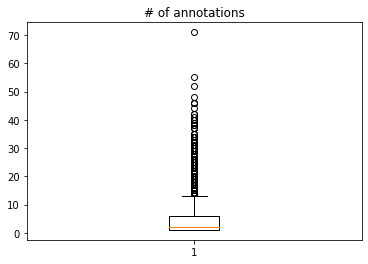

In [21]:
plt.boxplot(data['image_id'].value_counts())
plt.title('# of annotations')
plt.show()

In [27]:
def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def plot_bbox(image, anns):
    for ann in anns:
        xmin, ymin, w, h = map(int, ann)
        image = cv2.rectangle(image, (xmin, ymin), (xmin + w, ymin + h), (0, 0, 255), 3)
    plt.imshow(image)
    plt.title(f'#{len(anns)}') # 이미지당 annot개수 표시
    
def get_annotations(df, image_num):
    image_df = df[df['image_id'] == image_num]
    anns = list(image_df['bbox'])
    #anns = [ann for ann in df['bbox'] if df['image_id'] == image_num]
    return anns

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23144 entries, 0 to 23143
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image_id     23144 non-null  int64  
 1   category_id  23144 non-null  int64  
 2   area         23144 non-null  float64
 3   bbox         23144 non-null  object 
 4   iscrowd      23144 non-null  int64  
 5   id           23144 non-null  int64  
 6   file_name    23144 non-null  object 
 7   x_min        23144 non-null  float64
 8   y_min        23144 non-null  float64
 9   w            23144 non-null  float64
 10  h            23144 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 2.1+ MB


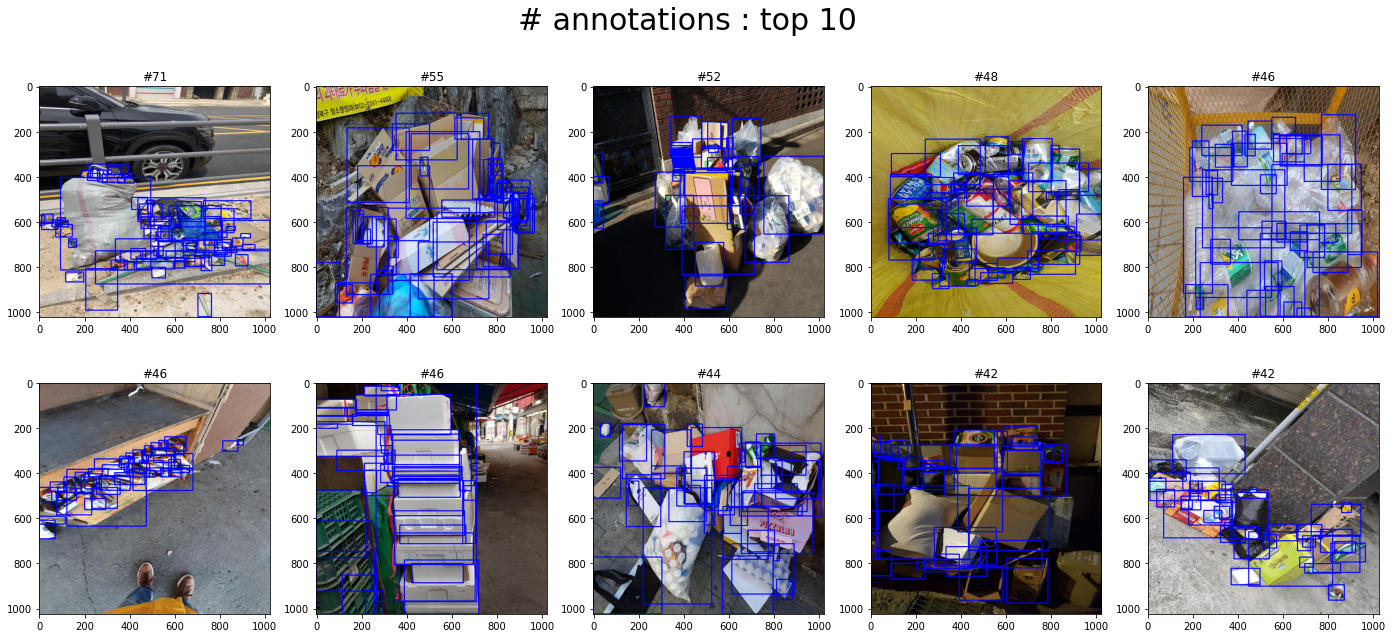

In [12]:
dataset_path = '/opt/ml/detection/dataset/'

fig = plt.figure(figsize=(24,10))
top_count = 10 # annot 개수 상위 몇개 가져올지 
many_annot_img = data['image_id'].value_counts()[:top_count].index 
for i, image_id in enumerate(many_annot_img):
    ax = fig.add_subplot(2, 5, i+1)
    id_len = len(str(image_id)) # 4자리 id 포맷 맞춰주기 위해
    image = read_image(dataset_path, 'train/'+'0'*(4-id_len)+str(image_id)+'.jpg')
    anns = get_annotations(data, image_id)
    plot_bbox(image, anns)
    
fig.suptitle(f'# annotations : top {top_count}', fontsize=30)
plt.show()
    

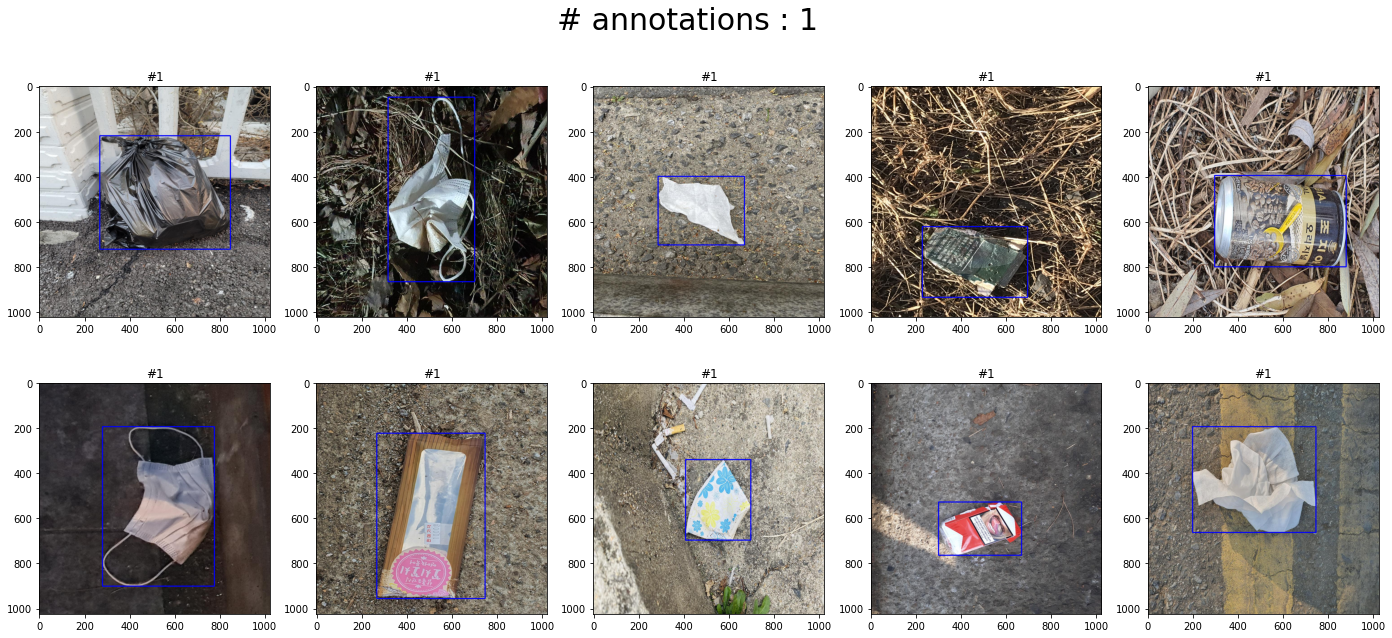

In [79]:
fig = plt.figure(figsize=(24,10))
top_count = 10 # 1개 짜리 

many_annot_img = data['image_id'].value_counts()[-top_count:].index 
for i, image_id in enumerate(many_annot_img):
    ax = fig.add_subplot(2, 5, i+1)
    id_len = len(str(image_id)) # 4자리 id 포맷 맞춰주기 위해
    image = read_image(dataset_path, 'train/'+'0'*(4-id_len)+str(image_id)+'.jpg')
    anns = get_annotations(data, image_id)
    plot_bbox(image, anns)
    
fig.suptitle(f'# annotations : 1', fontsize=30)
plt.show()

In [ ]:
# 카테고리별 bbox 사이즈 통계량


In [105]:
type(data.category_id[0])

numpy.int64

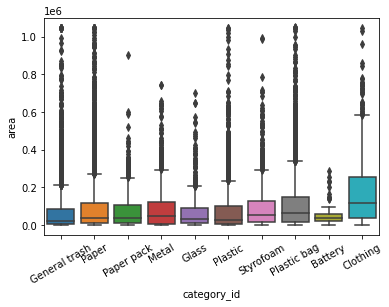

In [107]:
sns.boxplot(x = "category_id", y = "area", data=data)
ticklabel=['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']

plt.xticks(list(range(10)), ticklabel, rotation = 30)
plt.show()

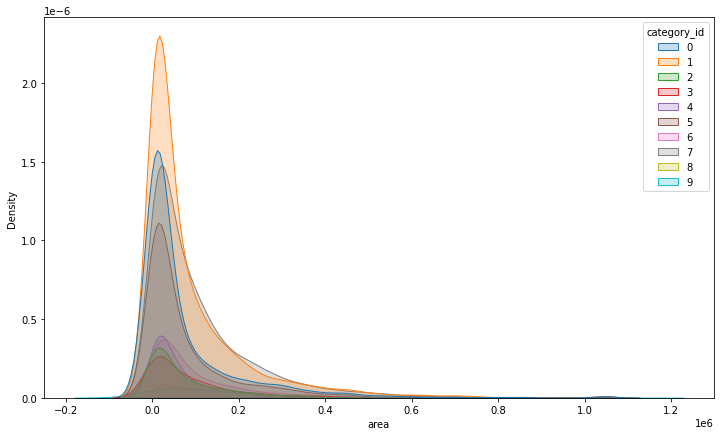

In [95]:
data['category_id'] =  list(map(str, data.category_id))
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x="area", data=data, ax=ax,
            fill=True, 
            hue='category_id', 
            hue_order=sorted(data['category_id'].unique()))
plt.show()
# 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing'

# 자주 등장하는 쓰레기 조합
- 이미지별로 쓰레기 종류를 담은 matrix 생성
- 이미지별로 군집화가 된다면(ex. 일반쓰레기는 주로 종이와 함께 등장)
- 이미지내에서 가장 많이 등장하는 클래스를 기준으로 train-split을 나누면 어떨까?

In [139]:
from collections import Counter
feature_matrix = pd.DataFrame({'image_id' : list(range(4883))}) # image id별 category id feature matrix (개수는 반영 안 함)
for i in range(10):
    feature_matrix['category'+str(i)] = 0
feature_matrix['most_common'] = 0
most_commont
for i in range(4883):
    image_df = data[data['image_id'] == i]
    feature_matrix['most_common'][i] = Counter(image_df['category_id']).most_common()[0][0]
    category_list = image_df['category_id'].unique()
    feature_matrix.iloc[i, [n+1 for n in category_list]] = 1


In [140]:
feature_matrix.head()

,image_id,category0,category1,category2,category3,category4,category5,category6,category7,category8,category9,most_common
0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,1,0,1,0,0,7
2,2,0,0,0,1,0,0,0,0,0,0,3
3,3,0,0,1,0,0,0,1,0,0,0,2
4,4,1,1,0,0,0,0,0,0,0,0,1


In [128]:
#!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=62067baa54f2886fb8d2b8b429df0bbaf382141ac860d2cbc6547417e986641c
  Stored in directory: /opt/ml/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


/opt/conda/envs/detection/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/envs/detection/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


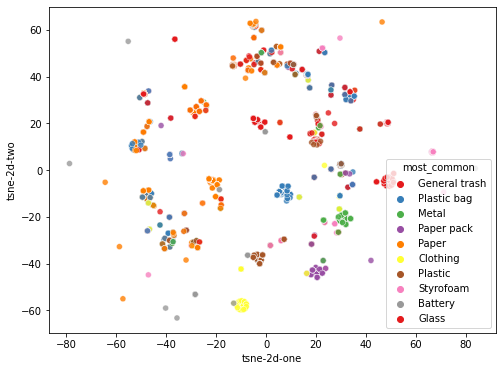

In [150]:
from sklearn.manifold import TSNE
# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
model = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
tsne_results = model.fit_transform(feature_matrix.iloc[:,1:11])

tsne_df=pd.DataFrame()
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
classes = {0:'General trash', 1:'Paper', 2:'Paper pack', 3:'Metal', 4:'Glass', 5:'Plastic', 6:'Styrofoam', 7:'Plastic bag', 8:'Battery', 9:'Clothing'}
tsne_df['most_common'] = [classes[num] for num in feature_matrix['most_common']]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = 'most_common',
    palette=sns.color_palette("Set1", 10),
    data=tsne_df,
    legend="full",
    alpha=0.8
)
plt.show()

- 이미지별로 간단한 tsne를 수행했을 때 군집화가 잘 되지 않았다
- 이미지별로 가장 많이 존재하는 클래스를 시각화해봤으나 뚜렷한 특징이 보이지 않음

# 쓰레기 조합을 EDA할 수 있는 방법??


## 보고 있는 자료
- 이미지 조합을 더욱 효과적으로 표현하는 알고리즘? [Neural Graph Collaborative Filtering](https://drive.google.com/file/d/1p5Se3KYacPth4f7O85wfpOtxi6Kbqm7l/view?usp=sharing)